# Agglomerative Clustering

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons , make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import * 
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram

### Data

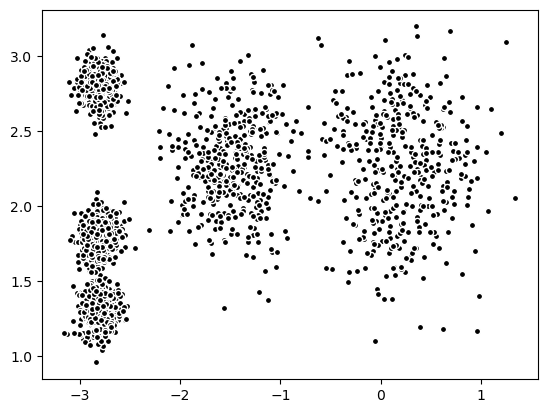

In [2]:
blob_centers = np.array([[ 0.2,  2.3],
                         [-1.5,  2.3],
                         [-2.8,  1.8],
                         [-2.8,  2.8],
                         [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X2, y2 = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.scatter(X2[:, 0], X2[:, 1], s=20, c='black', edgecolor='white')

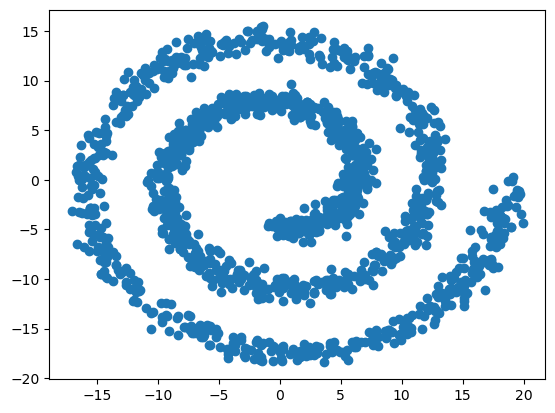

In [3]:
n_samples = 1500
np.random.seed(0)

t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X3 = np.concatenate((x, y))
X3 += 0.7 * np.random.randn(2, n_samples)
X3 = X3.T

plt.scatter(X3[:, 0], X3[:, 1])

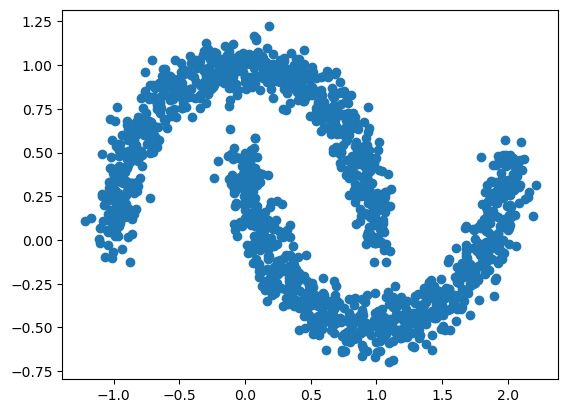

In [4]:
x , _ = make_moons(n_samples=1500 , noise=0.08 , random_state=10)

plt.scatter(x[:, 0], x[:, 1])

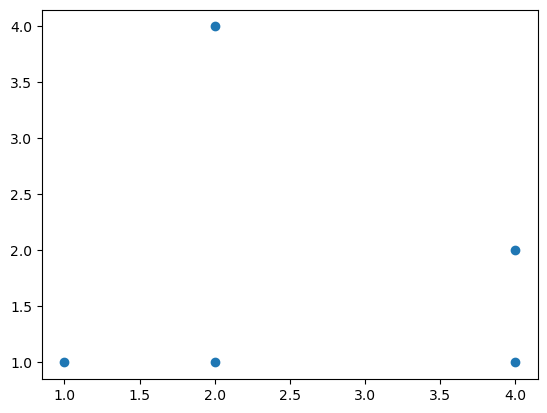

In [5]:
X4 = np.array([[1, 1], [2, 4], [2, 1], [4, 1], [4, 2]])

plt.scatter(X4[:, 0], X4[:, 1])

,gender,age,annual_income,spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


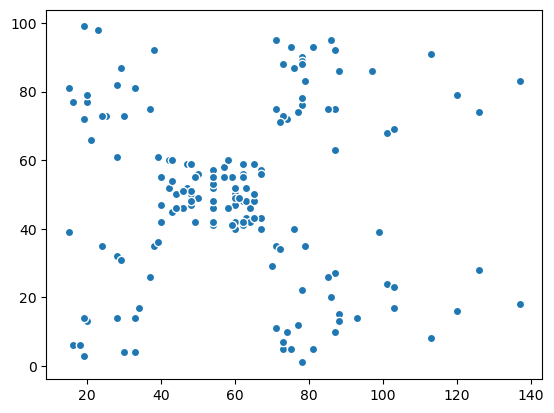

In [6]:
X = pd.read_csv('data/Mall_Customers.csv')
X.columns = ['customer_id', 'gender', 'age', 'annual_income', 'spending_score']
X = X.drop('customer_id', axis=1)
X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})
display(X.head())


X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

X_train = X_train.values
X_test = X_test.values

plt.scatter(X_train[:,-2] , X_train[:,-1] , edgecolors='w' )

## Train Model And Visualize

### Example 1

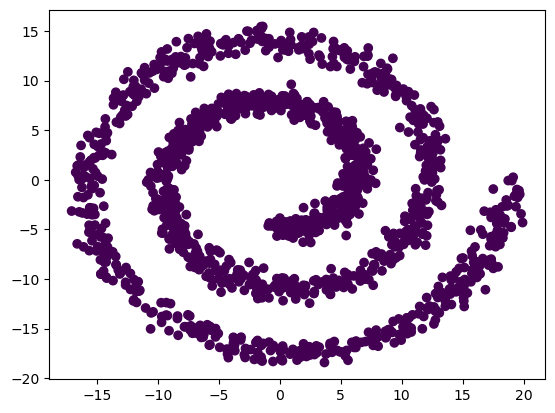

In [7]:
model  = AgglomerativeClustering(n_clusters=None , linkage='single' , distance_threshold=1.5)
model.fit(X3)

plt.scatter(X3[:,0] , X3[:,1] , c=model.labels_)

### Example 2

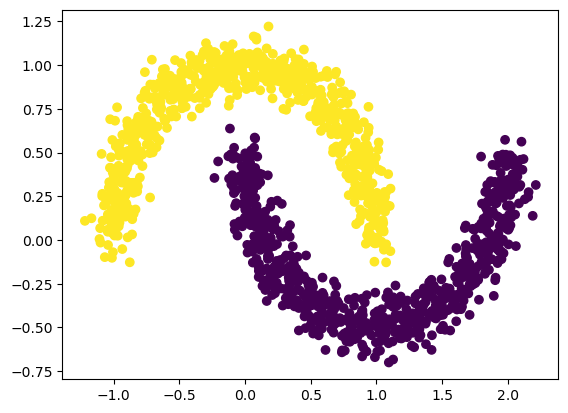

In [8]:
model  = AgglomerativeClustering(n_clusters=2 , linkage='single' )
model.fit(x)

plt.scatter(x[:,0] , x[:,1] , c=model.labels_)

### Example 3

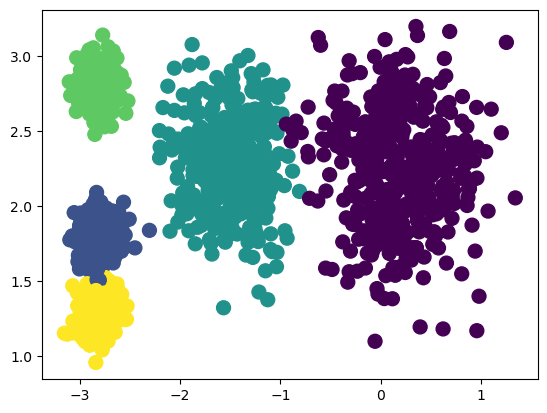

In [9]:
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X2)

labels = agg.labels_
# print(np.unique(labels))

plt.scatter(X2[:, 0], X2[:, 1], s=100, c=labels);

### Example 4

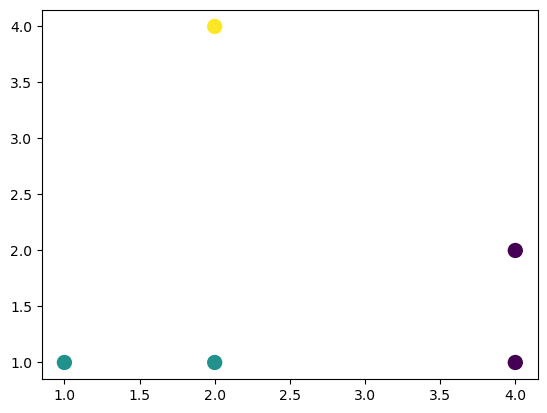

In [10]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_distances=True)
agg.fit(X4)

labels = agg.labels_

plt.scatter(X4[:, 0], X4[:, 1], s=100, c=labels);

In [11]:


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

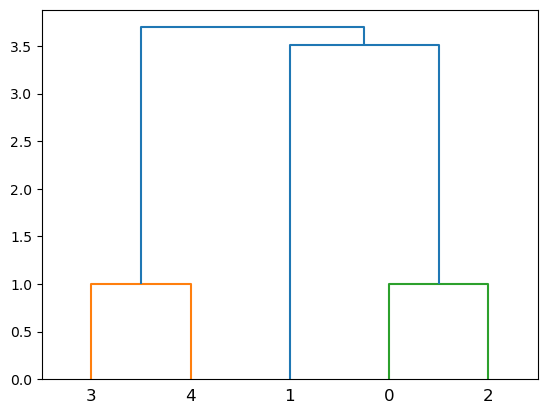

In [12]:
plot_dendrogram(agg, truncate_mode="level", p=3)